<a href="https://colab.research.google.com/github/Renjian-buchai/buildingBloCS/blob/main/FINALIMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from tensorflow import keras
import ipywidgets as widgets 
import tensorflow as tf
import numpy as np
from tensorflow import keras
import PIL
from PIL import Image
import io
from google.colab.patches import cv2_imshow
import cv2
import imutils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import imutils


img_height = 180
img_width = 180
class_names = ['Alaxan', 'Bactidol', 'Bioflu', 'Biogesic', 'DayZinc', 'Decolgen', 'Fish Oil', 'Kremil S', 'Medicol', 'Neozep']

In [56]:
def predict(pill_path):
  # pill_path = "drive/MyDrive/neozep.jpg"

  img = tf.keras.utils.load_img(
      pill_path, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This pill is most likely {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  return class_names[np.argmax(score)]
  

In [57]:
class_values = {}

for class_name in class_names:
    value = input(f"Enter the value for {class_name}: ")
    class_values[class_name] = value

# print(class_values)

Enter the value for Alaxan: 2
Enter the value for Bactidol: 3
Enter the value for Bioflu: 5
Enter the value for Biogesic: 7
Enter the value for DayZinc: 1
Enter the value for Decolgen: 2
Enter the value for Fish Oil: 
Enter the value for Kremil S: 5
Enter the value for Medicol: 6
Enter the value for Neozep: 2
{'Alaxan': '2', 'Bactidol': '3', 'Bioflu': '5', 'Biogesic': '7', 'DayZinc': '1', 'Decolgen': '2', 'Fish Oil': '', 'Kremil S': '5', 'Medicol': '6', 'Neozep': '2'}


In [58]:

def labelImg(pill_path, labelName):
  image = load_img(pill_path, target_size=(224, 224))
  image = img_to_array(image) / 255.0
  image = np.expand_dims(image, axis=0)

  # make bounding box predictions on the input image
  preds = object_detection_model.predict(image)[0]
  startX, startY, endX, endY = preds[:4]  # Assuming the bounding box coordinates are at indices 0 to 3

  # Check the highest predicted probability
  highest_prob_index = np.argmax(preds)
  highest_prob = preds[highest_prob_index]

  if highest_prob > 0.6:
      # load the input image (in OpenCV format), resize it to fit the screen, and grab its dimensions
      image = cv2.imread(pill_path)
      image = imutils.resize(image, width=600)
      (h, w) = image.shape[:2]

      # scale the predicted bounding box coordinates based on the image dimensions
      startX = int(startX * w)
      startY = int(startY * h)
      endX = int(endX * w)
      endY = int(endY * h)

      # draw the predicted bounding box on the image and label it as "Pill"
      cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
      cv2.putText(image, labelName, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

      # show the output image
      cv2_imshow(image)


In [59]:
def print_class_message(class_name):
    class_value = class_values.get(class_name)
    if class_value:
        print(f"Take {class_value} of {class_name}")
    else:
        print(f"You don't need this medicine {class_name}")

You have to take 2 Alaxan.
You have to take 3 Bactidol.
You have to take 5 Bioflu.
You have to take 7 Biogesic.
You have to take 1 DayZinc.
You have to take 2 Decolgen.
You have to take  Fish Oil.
You have to take 5 Kremil S.
You have to take 6 Medicol.
You have to take 2 Neozep.


HTML(value='<h1>MedementiaX</h1>')

Button(description='Check', icon='check', style=ButtonStyle(), tooltip='Description')

FileUpload(value={}, accept='.jpg', description='Upload')

1/1 [==============================] - 0s 111ms/step
This pill is most likely Medicol with a 100.00 percent confidence.
1/1 [==============================] - 1s 722ms/step


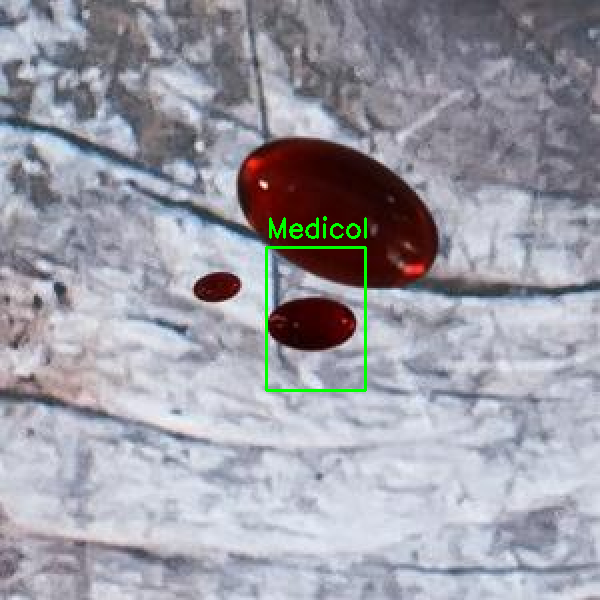

Take 6 of Medicol


In [60]:

model = keras.models.load_model('/content/prediction.h5')
object_detection_model = keras.models.load_model('/content/detector2.h5')

text = widgets.HTML(
    value="<h1>MedementiaX</h1>",
    
)
for class_name, class_value in class_values.items():
    print(f"You have to take {class_value} {class_name}.")
display(text)
uploaded_file = widgets.FileUpload(
    accept='.jpg',  
    multiple=False 
)


button = widgets.Button(
    description='Check',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)
display(button,uploaded_file)
def on_button_clicked(b): 
    #reading data from uploaded_file
    uploaded_filename = list(uploaded_file.value.keys())[0]
    uploaded_data = uploaded_file.value[uploaded_filename]['content']
    # Save the uploaded image
    with open(uploaded_filename, 'wb') as f:
        f.write(uploaded_data)
    #Run prediction
    prediction = predict(uploaded_filename)
    labelImg(uploaded_filename,prediction)
    print_class_message(prediction)
    
button.on_click(on_button_clicked)